# EDA WORKFLOW

## STEP 1 Read the Data Dictionary!
make sure you know what is the target value
seperate numerical and categorical values

## STEP 2 Write and check assumptions

## STEP 3 Look at the data
df.head() / df.tail() / df.sample() 

## STEP 4 Look at missing values
df.isnull().sum()

## STEP 5 General statistics:
df.info()
df.describe(include='all')


## STEP 6 plot distribpution
(box plot /  histogram)

## STEP 7 plot inner correlations
(heatmap)

## STEP 8 show corraltion to the target value

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def get_numerical_categorical(df):
    """
    This function recives a DataFrame and return two list, 1st is the numerical column names and
    the 2nd is the categoricall column names
    """
    numerical = list(df.describe().columns)
    categorical = list(np.setdiff1d(list(df.columns),numerical))
    return numerical, categorical

In [3]:
def all_values_in_list(df_series, options):
    """
    This function returns True if all the values in a Series are in the options list.
    Used for categorical features
    """
    return df_series.isin(options).all()

def all_values_in_range(df_series, limit1, limit2):
    """
    This function returns True if all the values in a Series are between limit1 and limit2.
    Used for numerical features
    """
    return df_series.between(limit1, limit2).all()    

In [4]:
def plot_numerical_box(df, features, remove_outliers=False, p=0.02):
    if len(features) < 1:
        print ("No numerical features to plot")
        return None
    num_features = len(features)
    plt.figure(figsize=(5*num_features,5))
    fig, ax = plt.subplots(nrows=num_features, ncols=2, figsize=[10, 5*num_features])
    for i, feature in enumerate(features):
        if remove_outliers:
            limits = df[feature].quantile(p), df[feature].quantile(1-p)
        else:
            limits = -np.inf, np.inf
        sns.boxplot(y=df[df[feature].between(*limits)][feature], ax=ax[i][0])
        ax[i][0].set_title(f'Box Distribution of {feature}')
        ax[i][1].plot(df[df[feature].between(*limits)][feature])
        ax[i][1].set_title(f'Distirbution of {feature} over the dataframe')
  
    plt.tight_layout()
    plt.show()

In [21]:
def plot_numerical_KDE(df, features, remove_outliers=False, p=0.02):
    if len(features) < 1:
        print ("No numerical features to plot")
        return None
    num_features = len(features)
    plt.figure(figsize=(5*num_features,5))
    fig, ax = plt.subplots(nrows=num_features, ncols=1, figsize=[10, 5*num_features])
    for i, feature in enumerate(features):
        if remove_outliers:
            limits = df[feature].quantile(p), df[feature].quantile(1-p)
        else:
            limits = -np.inf, np.inf
        sns.kdeplot(df[df[feature].between(*limits)][feature], ax=ax[i])
        ax[i].set_title(f'Box Distribution of {feature}')
  
    plt.tight_layout()
    plt.show()

In [39]:
def plot_categorical_countplot(df, features, normalize = False):
    num_features = len(features)
    plt.figure(figsize=(5*num_features,5))
    if num_features > 1:
        fig, ax = plt.subplots(nrows=num_features, figsize=[5, 5*num_features])
        for i, feature in enumerate(features):
            sns.countplot(x=df[feature], ax=ax[i])
            ax[i].set_title(f'Distribution of {feature}')
    else:
        feature = features[0]
        sns.countplot(x=df[feature])
        plt.title(f'Distribution of {feature}')
    plt.show()

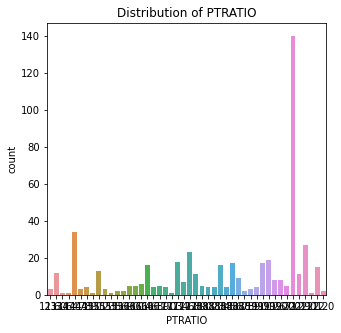

In [40]:
plot_categorical_countplot(df, ['PTRATIO'])

step 0 - load the data

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['PRICE'] = boston.target

Step 1 - read the data dictionary

In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
numerical, categorical = get_numerical_categorical(df)

The use of this function requires a sanity check!

STEP 2 Write and check assumptions

In [10]:
all_values_in_list(df['CHAS'], [0,1])

True

In [11]:
all_values_in_range(df['LSTAT'], 0, 100)

True

STEP 3 Look at the data

In [12]:
display(df.head(5))
display(df.sample(5))
display(df.tail(5))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12,13.1
107,0.13117,0.0,8.56,0.0,0.520,6.127,85.2,2.1224,5.0,384.0,20.9,387.69,14.09,20.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
463,5.82115,0.0,18.10,0.0,0.713,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29,20.2
236,0.52058,0.0,6.20,1.0,0.507,6.631,76.5,4.1480,8.0,307.0,17.4,388.45,9.54,25.1


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


STEP 4 Look at missing values

In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

STEP 5 General statistics:

In [14]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
from bubble_plot.utils import describe_categorical_values

describe_categorical_values(df, non_interesting_columns=numerical, num_categories=6)

""


STEP 6 plot distribpution

In [ ]:
plot_numerical_distrebution(df, numerical)

In [ ]:
plot_numerical_KDE(df, numerical)

In [ ]:
from seaborn import histplot

STEP 7 plot inner correlations